## Putouts by position

Obtain a bar chart per year with the putouts per position. Use the Fieding Data base. After reviewing the different charts from different eras, what are your observations?

Obtenga una gráfica de barras por cada año donde aparezca la cantidad de puestos outs (putouts) por posición. Use la base de datos Fielding.csv. Después de ver todas las gráficas en diferentes eras, ¿qué observa?

The set of databases can be found in this link. Consider it is a csv file. Find the data bases in the Core folder.

https://github.com/chadwickbureau/baseballdatabank/tree/master/core

Fielding.csv database

https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Fielding.csv

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters. Change as needed before running
FIELDING_DB_ADDRESS = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Fielding.csv'
START_YEAR = 2019
END_YEAR = 2022
COLUMNS_TO_RETRIEVE = ['yearID', 'P', 'C', '1B', '2B', '3B', 'SS', 'OF']
GRAPH_XLIM = 0
GRAPH_YLIM = 50000

In [3]:
# Read database and create a data frame with it
fieldingDb = pd.read_csv(FIELDING_DB_ADDRESS)

In [4]:
# Create, allocate and populate array

putOutsArray = np.ones([END_YEAR-START_YEAR, len(COLUMNS_TO_RETRIEVE)])
for column in range(len(COLUMNS_TO_RETRIEVE)):
    for year in range(START_YEAR, END_YEAR):
        condition1 = fieldingDb.yearID == year
        condition2 = fieldingDb.POS == COLUMNS_TO_RETRIEVE[column]
        thisYearSumPO = fieldingDb.loc[condition1 & condition2, 'PO'].sum()
        putOutsArray[year-START_YEAR, column] = int(thisYearSumPO)
        putOutsArray[year-START_YEAR,0] = int(year)

In [5]:
# Create a data frame with the putouts array (Optional)
putOutsDf = pd.DataFrame(putOutsArray, columns = COLUMNS_TO_RETRIEVE)

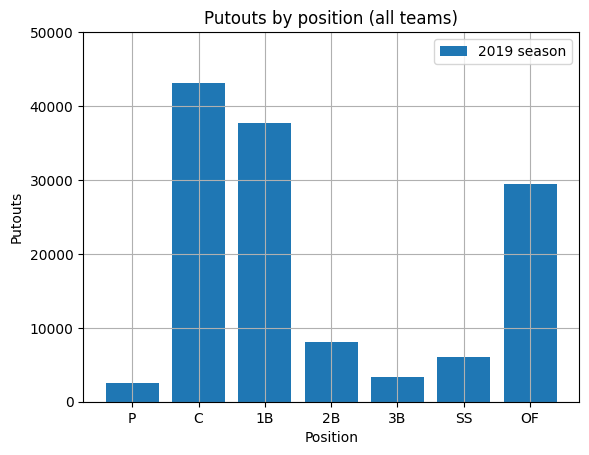

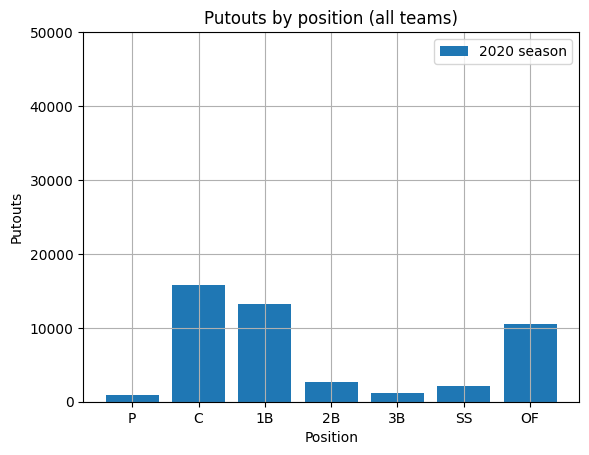

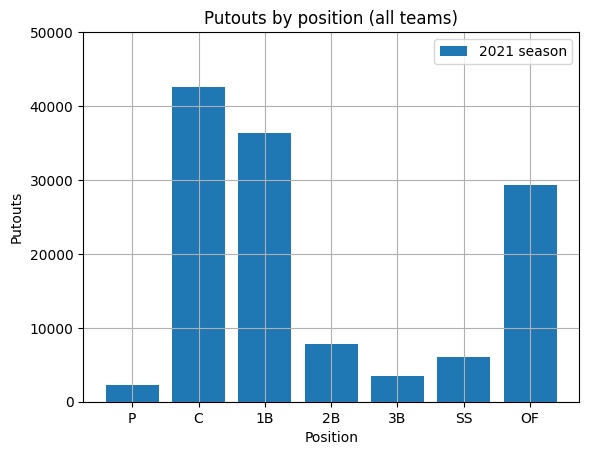

<Figure size 640x480 with 0 Axes>

In [6]:
# Plot the data. One different image per year

for year in range(START_YEAR, END_YEAR):
    plt.bar(COLUMNS_TO_RETRIEVE[1:len(COLUMNS_TO_RETRIEVE)], putOutsArray[year-START_YEAR, 1:len(COLUMNS_TO_RETRIEVE)])
    plt.title('Putouts by position (all teams)')
    plt.grid()
    plt.xlabel('Position')
    plt.ylabel('Putouts')
    plt.ylim([GRAPH_XLIM, GRAPH_YLIM])
    plt.legend([str(year) + ' season'])
    plt.figure().clear()